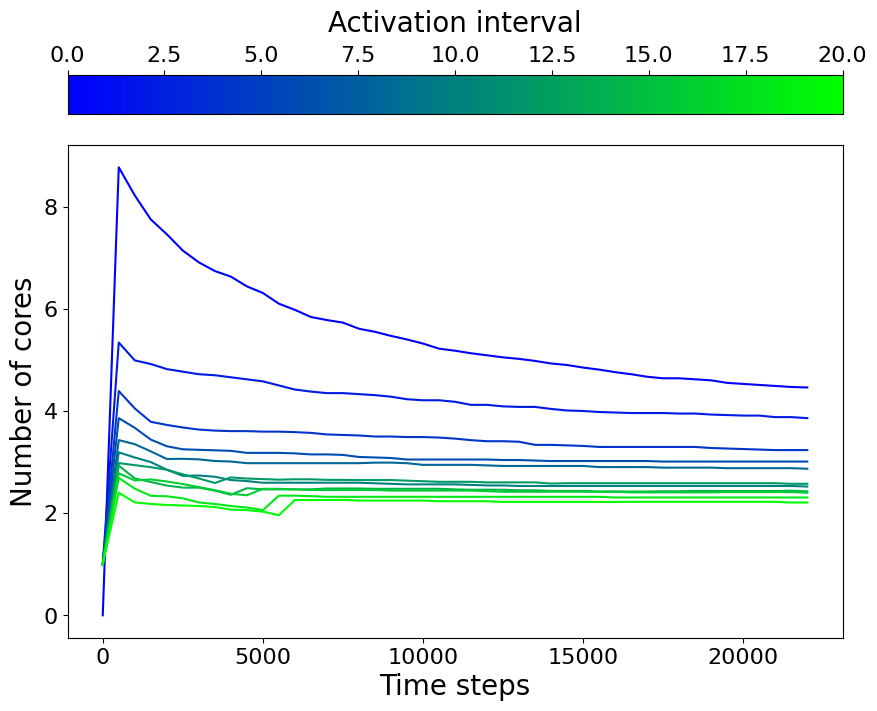

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import Normalize

font_scale = 2

# Load data
timedata = pd.read_csv('simulation_outputs/timedata.csv').dropna()

# Get unique k values in ascending order
unique_k_values = sorted(timedata['k'].unique())

# Define a custom colormap transitioning from blue to green
colors = [(0, 0, 1), (0, 1, 0)]  # Blue to green
n_bins = 100  # Number of bins for smooth transition
cmap_name = "blue_to_green"
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Function to get color based on k value
def get_color(k, min_k, max_k):
    """Get color based on k value proportion between min_k and max_k."""
    return cmap((k - min_k) / (max_k - min_k))

# Plotting mean and std number of cores as a function of time for each k value
fig, ax = plt.subplots(figsize=(10, 8))

for k_value in unique_k_values:
    # Filter data for the current k value
    k_data = timedata[timedata['k'] == k_value]
    
    # Group data by 'time' and calculate mean and standard deviation for each group
    k_grouped = k_data.groupby('timestep')['cluster_count'].agg(['mean', 'std']).reset_index()
    
    # Plot for current k value
    time_steps = k_grouped['timestep']
    color = get_color(k_value, min(unique_k_values), max(unique_k_values))  # Gradual color change from blue to green
    ax.plot(time_steps, k_grouped['mean'], color=color)
    # ax.fill_between(time_steps, 
    #                 k_grouped['mean'] - k_grouped['std'], 
    #                 k_grouped['mean'] + k_grouped['std'], 
    #                 color=color, alpha=0.2)

# Adding labels, title
ax.set_xlabel('Time steps',fontsize=10*font_scale)
ax.set_ylabel('Number of cores',fontsize=10*font_scale)

# Add colorbar for k values
norm = Normalize(vmin=min(unique_k_values), vmax=max(unique_k_values))
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax,orientation='horizontal',location='top')
cbar.set_label('Activation interval', rotation=0, labelpad=10,fontsize=10*font_scale)
cbar.ax.tick_params(labelsize=8*font_scale)  # Set the desired font size
# cbar.ax.set_xlabel('k value', labelpad=10, rotation=0, ha='center')

plt.xticks(fontsize=8 * font_scale)
plt.yticks(fontsize=8 * font_scale)

# Show plot
plt.show()
